# Required Libraries
These cells import the required libraries and mount the Drive storage.


In [33]:
pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
client_id = 'aca1ad95b3a945dcb8f3dc98f9ac87bc'
client_secret = '9dc90362f053404d8c85a15784ce9c8a'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [5]:
# reading in tracks_df and indexing to select numerical features
spotify_df = pd.read_csv("/content/drive/MyDrive/tracks_features.csv")
features_df = spotify_df[['year', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']].dropna()

In [6]:
features_df.rename(columns = {'year': 'released_year'}, inplace = True) #renames year to released_year

In [7]:
def playlist_songs(link):
    output_dict = {} 
    audio_keys = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
                  'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
    for x in ["name", "artist", "released_year"] + audio_keys:
        output_dict[x] = [] 
    
    playlist_uri = link.split("?")[0].strip("https://open.spotify.com/playlist/")
    
    for track in sp.playlist(playlist_uri)["tracks"]["items"]:
        output_dict["name"].append(track['track']['name'])
        output_dict['artist'].append(track['track']['artists'][0]['name'])
        output_dict['released_year'].append(track['track']['album']["release_date"].split('-')[0])
        
        song_uri = track['track']['uri']
        filtered_dict = {k:v for k,v in sp.audio_features(song_uri)[0].items() if k in audio_keys}
        for audio_feature in filtered_dict.keys():
            output_dict[audio_feature].append(filtered_dict[audio_feature])
    output = pd.DataFrame(output_dict)
    output["released_year"] = output["released_year"].astype(int)
    return output

def get_average_values(df):
    output_dict = {}
    output_dict["genres"] = []
    
    for x in df["artist"]:
        artist_items = sp.search(x, type = "artist")["artists"]["items"]
        for y in artist_items: 
            for genres in y['genres']:
                if genres not in output_dict["genres"]:
                    output_dict["genres"].append(genres)
        
    features = ['released_year', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
                  'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
    
    for x in features: 
        output_dict[x] = np.mean(df[x])
    return pd.DataFrame(output_dict)

def combine_functions(link): 
    return get_average_values(playlist_songs(link))

In [29]:
knn = NearestNeighbors(n_neighbors=15, metric='euclidean')
knn.fit(features_df)

NearestNeighbors(metric='euclidean', n_neighbors=15)

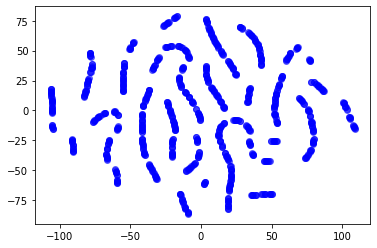

In [13]:
#Plotting
subset_data = features_df.sample(n=1000, random_state=42)
tsne = TSNE(n_components=2, perplexity = 5)
reduced_data = tsne.fit_transform(subset_data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', alpha=0.5)
plt.show()

In [85]:
link = "https://open.spotify.com/playlist/5rO50HgrVgjwMMpeMzaXFX?si=4485d7e0bdfc4202" #AAAAAAA
#link = "https://open.spotify.com/playlist/1X3tp1O7AFjrqsAmoHABv7?si=16bf1498580c463d" #mustard
#link = "https://open.spotify.com/playlist/5yADiS2cnUoIoJFV3Oz0x6?si=V8jEPwVeQ2e3XLFDv3ZM3Q" #sandwich
#link = "https://open.spotify.com/playlist/7FOKj5m7cZXSOJGr2ExjAL?si=f4138ffcb0c24cd0" #slee
#link = "https://open.spotify.com/playlist/0cGnwpgxf41Ec8ZaB7ZUuS?si=2504dd5d056b41a8" #BIG BOOTY BUILDER
df_test = pd.DataFrame(combine_functions(link))
df_test

,genres,released_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,5th wave emo,2020.25,0.47585,0.80365,6.7,-5.3218,0.65,0.135605,0.075092,0.061775,0.24389,0.53175,143.8577,195448.3
1,alternative emo,2020.25,0.47585,0.80365,6.7,-5.3218,0.65,0.135605,0.075092,0.061775,0.24389,0.53175,143.8577,195448.3
2,bubblegrunge,2020.25,0.47585,0.80365,6.7,-5.3218,0.65,0.135605,0.075092,0.061775,0.24389,0.53175,143.8577,195448.3
3,diy emo,2020.25,0.47585,0.80365,6.7,-5.3218,0.65,0.135605,0.075092,0.061775,0.24389,0.53175,143.8577,195448.3
4,emo,2020.25,0.47585,0.80365,6.7,-5.3218,0.65,0.135605,0.075092,0.061775,0.24389,0.53175,143.8577,195448.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,scottish folk,2020.25,0.47585,0.80365,6.7,-5.3218,0.65,0.135605,0.075092,0.061775,0.24389,0.53175,143.8577,195448.3
111,contemporary country,2020.25,0.47585,0.80365,6.7,-5.3218,0.65,0.135605,0.075092,0.061775,0.24389,0.53175,143.8577,195448.3
112,country,2020.25,0.47585,0.80365,6.7,-5.3218,0.65,0.135605,0.075092,0.061775,0.24389,0.53175,143.8577,195448.3
113,country dawn,2020.25,0.47585,0.80365,6.7,-5.3218,0.65,0.135605,0.075092,0.061775,0.24389,0.53175,143.8577,195448.3


In [86]:
distances, indices = knn.kneighbors(df_test[['released_year', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                  'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']])



Generating our recommendations..


In [87]:
nearest_neighbors = spotify_df.iloc[indices[0]]
nearest_neighbors
genre_list = []
genre_dict = {}
for artist in nearest_neighbors['artists']:
    result = sp.search(artist)
    try:
      track = result['tracks']['items'][0]
      artist_info = sp.artist(track["artists"][0]["external_urls"]["spotify"])
      genre_list.append(sp.artist(track["artists"][0]["external_urls"]["spotify"])["genres"])
    except:
      genre_list.append("unknown")
genre_dict
nearest_neighbors['genres'] = genre_list
nearest_neighbors.loc[:,'genres'] = genre_list
nearest_neighbors

<ipython-input-87-1cc475726492>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nearest_neighbors['genres'] = genre_list
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,genres
1153489,48xXpImHOVGadlevG1y2Q2,Ways,Dead Leaves 3,4o90mA4XMXnNJHopaITBqj,"['RiverKinn', 'Joei Razook']","['7wNEymciP9rFvdso0mOAyO', '7lKfXXpidmX8SAO3cE...",2,1,True,0.627,...,0.133000,0.709000,0.1130,0.1850,139.924,195448,4.0,2020,2020-01-31,"[dark trap, emo rap, sad rap]"
923897,6OiznKLf0QPoxxLUImu45W,Выходи гулять,Об изъяне понятно,4A8NYSLr3XuFgOs1r0a6qG,['Kasta'],['5I37oVgAnT7OGiqKJSMVRH'],11,1,False,0.728,...,0.291000,0.000000,0.1340,0.4330,150.138,195448,4.0,2019,2019-12-04,"[russian gangster rap, russian hip hop]"
876593,1VoQlAVi77vyEc6Sz5IXkw,Dark Night of the Soul,Life Goes On,6dN3EXFqEO4ve2uhidIvED,['Lovespirals'],['2NnICCxmynsBCHpetiQS7y'],6,1,False,0.288,...,0.012300,0.614000,0.0835,0.2950,148.159,195450,4.0,2018,2018-11-02,[anime cv]
739557,6s251GV7OGkDQ0OfXKGRZP,Teenage Heartbreak Queen,Boom Boom Room (Side B),6R8AAzKYJ7KrmYx0DYosy3,['Palaye Royale'],['0hAd6zwEgt9ILuMDY1prcI'],2,1,False,0.460,...,0.013100,0.000000,0.1480,0.6810,142.136,195440,4.0,2018,2018-09-28,"[modern alternative rock, modern rock, rock, v..."
1010677,7wKLExoSsAJxZabw6PASNB,GTA Lyfestyle,Anyways,2Un7PE3GaK2Mbg2iYBYfMN,['Young Nudy'],['5yPzzu25VzEk8qrGTLIrE1'],4,1,True,0.747,...,0.388000,0.000000,0.0776,0.6210,148.191,195440,4.0,2020,2020-02-24,"[hip hop, pluggnb, rap, trap, vapor trap, vira..."
1032791,3OkG3qSi5X6WVFlze1Q1LJ,Just A Phase,All That Emotion,7f0Cp7JmNvI8barXSh7UN0,['Hannah Georgas'],['1ZBR8sri8ddYowXDENBwKS'],8,1,False,0.632,...,0.737000,0.170000,0.0825,0.5800,150.019,195455,4.0,2020,2020-09-04,"[canadian indie, vancouver indie]"
1106210,554qnnGxkUXGRkhBjK9Kd8,Am I Alive?,More Songs 2,3U0EPogiy7dI9tplXB939R,['4 A.M.'],['7pDzcyTdHlIvuAQ4R5zgM9'],4,1,False,0.703,...,0.765000,0.195000,0.1090,0.1040,140.063,195438,4.0,2020,2020-10-02,[]
1089379,4T3i2PKPiBkNvPCgSKKdeL,Festival of Lights,Snowbound,6joo22r88KqXxvOgEORO9R,['Purrple Cat'],['73aKnLT4O8G2pBEfdlQzrE'],1,1,False,0.541,...,0.509000,0.860000,0.3490,0.0595,148.135,195439,4.0,2019,2019-12-01,"[focus beats, lo-fi beats]"
599124,6VNwVXu3znz7mhQ679rfEy,Praying Man,A Season To Remember,4YCYgKWvxQEyuEFoCP28Qr,"['Brian Free', 'Assurance']","['57PRB2opCrH6LlWS4INhi0', '0zFdl3BbxeSiBfD8Sv...",3,1,False,0.557,...,0.030200,0.000000,0.3400,0.8010,143.921,195440,4.0,2011,2011-08-16,[southern gospel]
523645,1Rnr2j6Ndp65CLySOqnw1l,Block Banger,Vintage Experience,31Gg1sOhaywlKoaZ07gnyh,['Wordsmith'],['2PxWEt0yMAXVZObIofSL09'],12,1,False,0.820,...,0.068300,0.000000,0.0468,0.7350,140.100,195440,4.0,2010,2010-03-30,[]


In [84]:
result = nearest_neighbors['genres'].apply(lambda x: any(item in df_test['genres'].values for item in x))
recs = nearest_neighbors[result]
recs[['name', 'artists', 'genres']]

,name,artists,genres
983190,Yellow Box,"['The Neighbourhood', 'Death Stranding: Timefa...","[modern alternative rock, modern rock, pop, sh..."
552426,Matrix of Perfection,['Servotron'],"[bedroom pop, indie pop, norwegian indie, pop]"
139894,It's Not So,"[""Dante's Lounge""]","[indie r&b, pop, r&b, trap soul, underground h..."
